In [ ]:
import cv2
import numpy

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image=cv2.imread('#path to your document')


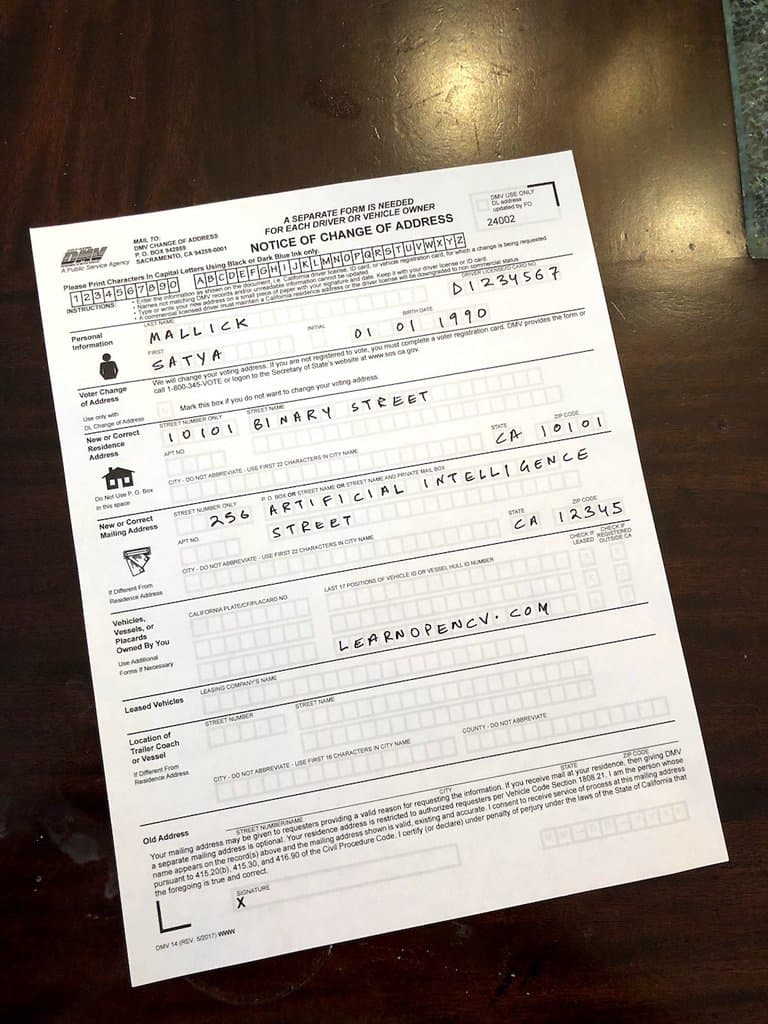

In [ ]:
cv2_imshow(image)

**converting rgb to bgr**

In [ ]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
pt1=pt2=500
image=cv2.resize(image,(500,500))
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

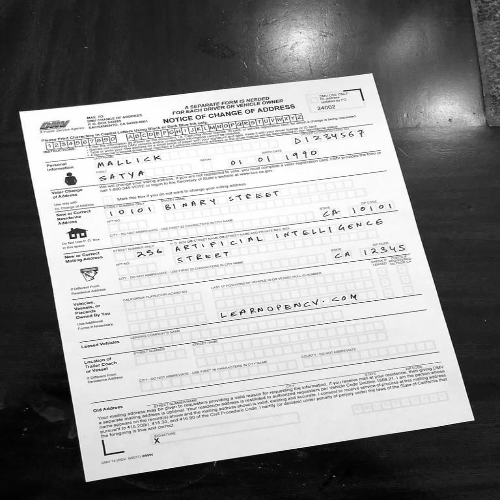

In [ ]:
cv2_imshow(image)

**preprocessing the image**

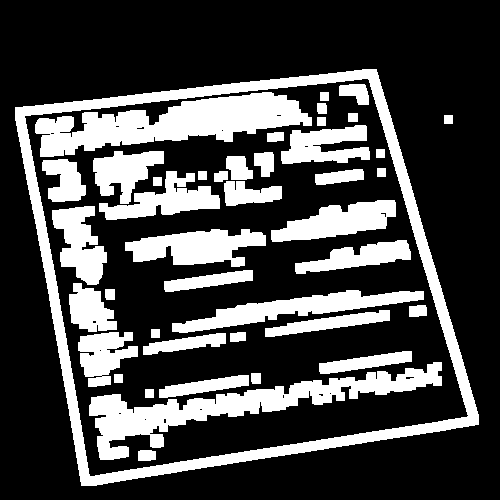

In [ ]:
canny=cv2.Canny(image,pt1,pt2)
kernel=numpy.ones((5,5),numpy.uint8)
dilated=cv2.dilate(canny,kernel,iterations=2)
eroded=cv2.erode(dilated,kernel,iterations=1)
eroded=cv2.resize(dilated,(500,500))
cv2_imshow(eroded)

**finding contours**

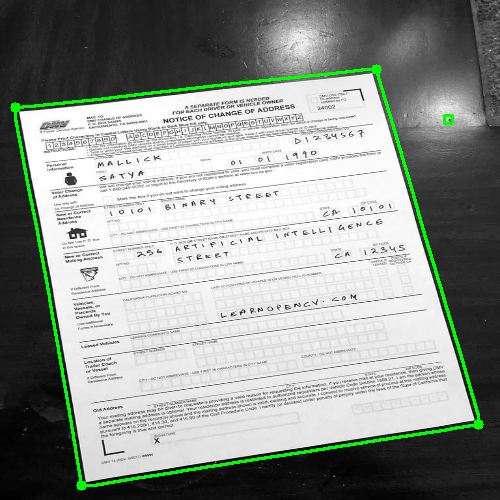

In [ ]:
contour,herirachy=cv2.findContours(eroded.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for l in contour:
    area=cv2.contourArea(l)
    if area>=5000:
        perimeter=cv2.arcLength(l,True)
        epsilon = 0.02 * perimeter
        approx = cv2.approxPolyDP(l, epsilon, True)
        cv2.polylines(image,approx,isClosed=True, color=(0, 255, 0), thickness=10)
cv2.drawContours(image,contour,-1,(0,255,0),2)
cv2_imshow(image)
width=height=500

**arranging the points in order to give it to wrap perspective**

In [ ]:
sorted_approx = sorted(approx, key=lambda x: x[0][0])
top_points = sorted_approx[:2]
bottom_points = sorted_approx[2:]
top_points = sorted(top_points, key=lambda x: x[0][1])
bottom_points = sorted(bottom_points, key=lambda x: x[0][1])
arranged_points = [top_points[0][0], bottom_points[0][0], top_points[1][0], bottom_points[1][0]]
print(list(arranged_points))
p1 = numpy.float32(arranged_points)
p2=numpy.float32([[0,0],[width,0],[0,height],[width,height]])

[array([ 15, 107], dtype=int32), array([376,  69], dtype=int32), array([ 81, 485], dtype=int32), array([478, 424], dtype=int32)]


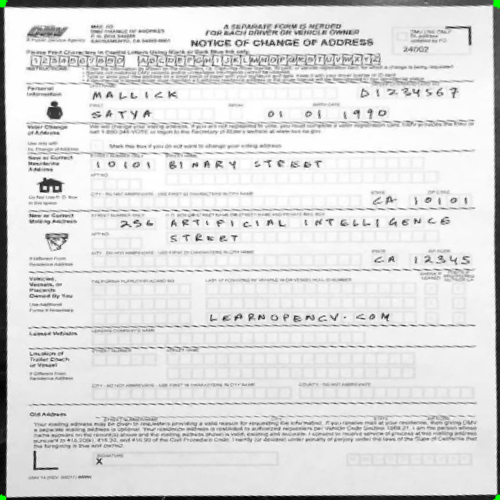

-1

In [ ]:
metrics=cv2.getPerspectiveTransform(p1,p2)
final_img=cv2.warpPerspective(image,metrics,(width,height))
cv2_imshow(final_img)

cv2.waitKey(0)